<font size = 4><b>Import Required Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
%matplotlib inline 
sns.set(context="notebook",style="white",palette="dark")
plt.style.use('ggplot')

import numpy as np #for scientific computations

from sklearn.model_selection import train_test_split #for train and test split
from sklearn.metrics import r2_score #R-squared
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

<font size = 4><b>Read the dataset

In [47]:
df = pd.read_excel('final ml data converted (1).xlsx')
print(df.shape)
df.head()

(6648, 6)


,Date,Game,Earnings,Players,Tournaments,Merchandise Profit
0,1 01 1998,QuakeWorld,15000.0,8,1,3000.0
1,1 05 1998,Quake II,14600.0,4,1,2920.0
2,1 07 1998,Quake II,15000.0,5,1,3000.0
3,1 07 1998,QuakeWorld,6500.0,4,1,1300.0
4,1 11 1998,Quake II,36600.0,13,2,7320.0


In [74]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
df['Date']= df['Date'].map(dt.datetime.toordinal)

<font size = 4><b> Dealing with missing values.

In [75]:
#The features with missing values
total = df.isnull().sum().sort_values(ascending=False)
missing_data = pd.DataFrame(total, columns = ["Missing Values"])
missing_data

,Missing Values
Game,40
Merchandise Profit,0
Tournaments,0
Players,0
Earnings,0
Date,0


__Inference:__ The __"Game"__ feature has 40 missing values, which needs to be filled. As the number of missing values is negligible in comparison to total number of row(6,648), we'll simply drop the rows that contain missing values.

In [76]:
## features with missing values
df = df.dropna()

##Check if any column still contain missing values
df.isnull().sum()

Date                  0
Game                  0
Earnings              0
Players               0
Tournaments           0
Merchandise Profit    0
dtype: int64

<font size = 4><b> Descriptive statistics 

A great way to start descriptive analysis is by simply looking at what kind of ranges each feature has and how much they vary around their average values.

In [77]:
df.describe()

,Date,Earnings,Players,Tournaments,Merchandise Profit
count,6608.000000,6.608000e+03,6608.000000,6608.000000,6.608000e+03
mean,735361.416919,1.395547e+05,50.306447,6.516041,2.791095e+04
std,1808.829359,9.335545e+05,115.827007,12.273671,1.867109e+05
min,729390.000000,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,734148.000000,1.000000e+03,5.000000,1.000000,2.000000e+02
50%,735965.000000,9.498000e+03,15.000000,2.000000,1.899600e+03
75%,736705.000000,5.283502e+04,42.000000,6.000000,1.056700e+04
max,737793.000000,3.671356e+07,1699.000000,172.000000,7.342711e+06


__Inference:__ \
This instantly provide us some information about the Merchandise Profit in dataset. We can see that maximum profit for Merchandise from any game is 7.3 million Dollars while the minimum profit is even Zero percent.

<font size = 4><B> Descriptive Analysis using Visualisation


<font size = 3><b> Checking for correlations among features

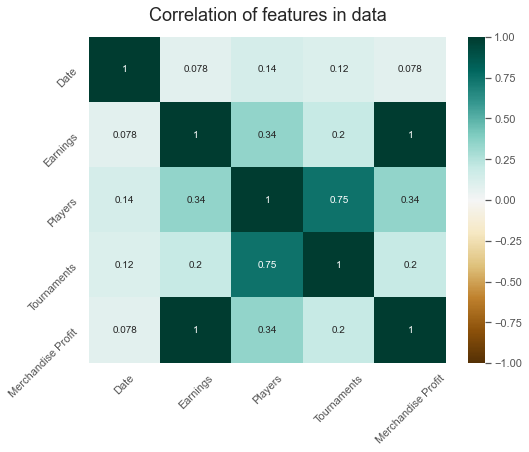

In [79]:
#Let's visualize correlations
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation of features in data', fontdict={'fontsize':18}, pad=16)
plt.yticks(rotation = 45)
plt.xticks(rotation = 45);

__Inference:__ The features with darker green color have higher correlation with Merchandise Profit while the features with lighter color have lower correaltion. It is clear from the above figure that __Merchnadise Revenue/Profit__ have strong correlation with __Earnings from E-sports.__ 

<font size = 4><B> Information about features in data

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6648 entries, 0 to 6647
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                6648 non-null   object 
 1   Game                6608 non-null   object 
 2   Earnings            6648 non-null   float64
 3   Players             6648 non-null   int64  
 4   Tournaments         6648 non-null   int64  
 5   Merchandise Profit  6648 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 311.8+ KB


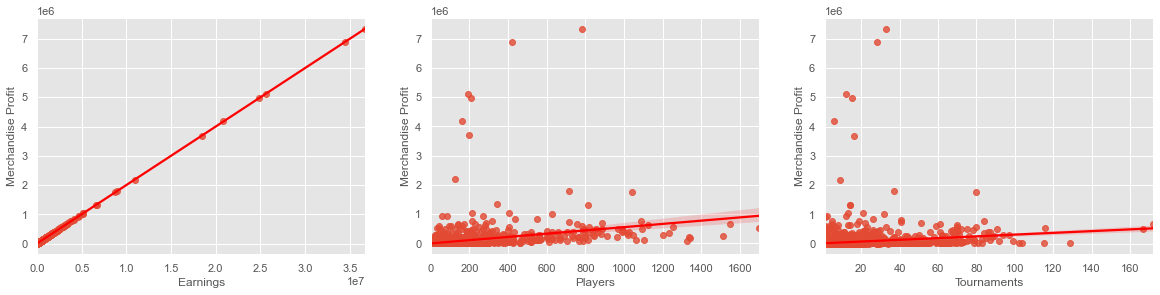

In [80]:
plt.figure(figsize=(20, 20))

for e, column in enumerate(['Earnings','Players','Tournaments']):
    plt.subplot(4, 3, e + 1)
    sns.regplot( data= df, x=column, y='Merchandise Profit', line_kws={"color": "red"})

__Inference:__ From the above graphs, we can depict that each of them Earnings, players and Tournaments have positive linear relationship with the Merchandise Profit. So, these three features will be very important in developing Regression Model for predictive analysis.

<font size = 5> <b> Correlation Tests  </b> </font>     



Tests whether two samples have a linear relationship.

<font size = 3> <b> Null Hypothesis and Alternate Hypothesis:</b><br></font>
<br>
For our Pearson test for Correaltion here: <br>
__Null Hypothesis:__ The null hypothesis is that there is no significant relationship between __"Earnings"__ from the E-sports and __"Merchandise Profit"__. <br>
__Alternative Hypothesis:__ There is significant relationship between __Earnings__ of E-sports and __Merchandise profit__ in our data.

In [25]:

# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
data1 = df['Earnings']
data2 = df['Merchandise Profit']
stat, p = pearsonr(data1, data2)

# Hypothesis test at significance level of 0.05  
# interpret p-value
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Independent (H0 holds true)')
else:
    print('Dependent (reject H0)')

stat=1.000, p=0.000
Dependent (reject H0)


__Inference:__ <br>The p-value of 0.000 which is much lower 0.05, so at the significance level of 0.05, we reject the Null Hypothesis and __accept Alternative Hypothesis__ that states There is significant relationship between __Earnings__ from E-sports and __Merchandise Profit__. So, we conclude that when the Earnings from the games competition increases, the Merchandise Profit increases as well

In [53]:
pivot_table =pd.pivot_table(df,index=["Game"],values=["Earnings", "Merchandise Profit"],aggfunc=np.sum).sort_values(by = ['Merchandise Profit'], ascending=False)
pivot_table

,Earnings,Merchandise Profit
Game,,
Dota 2,2.313352e+08,4.626705e+07
Counter-Strike: Global Offensive,1.109864e+08,2.219728e+07
Fortnite,1.023435e+08,2.046869e+07
League of Legends,8.225516e+07,1.645103e+07
StarCraft II,3.473507e+07,6.947015e+06
...,...,...
Mortal Kombat vs. DC Universe,0.000000e+00,0.000000e+00
Dead or Alive 5,0.000000e+00,0.000000e+00
Dead or Alive 5 Ultimate,0.000000e+00,0.000000e+00


<font size = 5><B>Regression model


We need to develop a regression model that predicts the Merchandise based on different features mainly the historic Earnings of Merchandise.
If we look at correlation figure above, we can observe that most of the features have postive correaltion with Merchadise Profit except for Date feature. So, we'll use onyl those feature/variables, that have higher impact on Profits.

### Seperate Dependent and Independent variables

In [26]:
X = df.drop(["Date","Game"], axis=1)
y = df["Merchandise Profit"]

### Divide the data set into Training set and Test set

In [27]:
#Divide the independent and dependent variables into training and testing sets(with 25% data for test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
#function for evaluation of model
def result(y_test,y_pred):
    r=[]
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)

#dataframe that store the performance of each model
accu=pd.DataFrame(index=[ 'R2 Score','Accuracy(%)'])

## Linear Regression, Random Forest Algorithm

### Creating the model

In [29]:
#libraries for models
from sklearn.ensemble import RandomForestRegressor

#fitting model
RFR = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(X_train,y_train)
y_pred = RFR.predict(X_test)

<h3>Measures for In-Sample Evaluation</h3>

<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>One of the very important measures that is often used in Statistics to determine the accuracy of a model is:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
</ul>
    
<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>

In [30]:
r5_rf=result(y_test,y_pred)
print("R2 Score : {} or {}%".format(r5_rf[0],r5_rf[1]))
accu['RandomForest Regressor']=r5_rf

R2 Score : 0.995198889638211 or 99.5199%


One way to look at the fit of the model is by looking at the <b>Actual vs Predicted barplot</b>: We can look at the accurracy of the forecasted values that result from the model and compare it to the actual values.</p>

In [31]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check.head()

,Actual,Predicted
230,3153.954,3157.756267
2540,5389.932,5412.727900
1385,2200.000,2199.514656
1544,474.144,475.008211
3692,40.000,40.000000


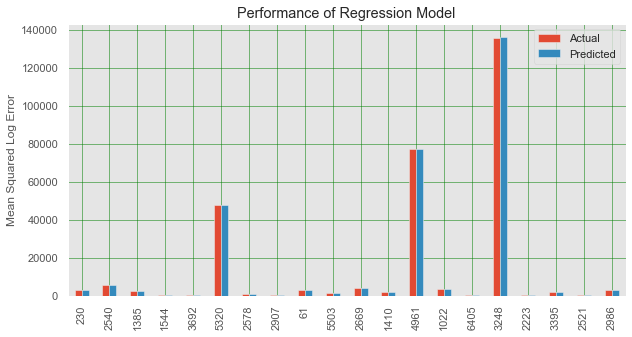

In [32]:
df_check = df_check.head(20)
df_check = round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Regression Model')
plt.ylabel('Mean Squared Log Error')
plt.show()

We can say that our model estimates/predicts the Merchandise Profits by more than 99% accuracy on test set.

<font size = 5><b> <center>THE END